In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('termdeposit_train.csv.crdownload')

In [3]:
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [4]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [5]:
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [6]:
#no null data is present in dataset

In [7]:
df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [9]:
#we observe that there are 8 interger columns and 10 object columns

In [10]:
df['subscribed'].unique()

array(['no', 'yes'], dtype=object)

In [11]:
df['previous'].unique()

array([  0,   3,   2,   4,   1,   5,   9,   6,   8,  11,  16,  10,  14,
         7,  12,  23,  13,  18,  30,  27, 275,  20,  15,  17,  19,  22,
        25,  26,  28,  29,  32,  21,  24,  38,  58,  35,  41,  37],
      dtype=int64)

In [12]:
df.poutcome.unique()

array(['unknown', 'success', 'failure', 'other'], dtype=object)

In [13]:
df.age.unique()

array([56, 31, 27, 57, 33, 50, 45, 35, 36, 44, 39, 43, 41, 53, 64, 48, 60,
       29, 30, 42, 46, 32, 63, 47, 49, 52, 68, 26, 58, 38, 54, 40, 59, 24,
       37, 34, 61, 55, 20, 69, 25, 62, 22, 51, 28, 70, 66, 23, 87, 71, 74,
       81, 73, 76, 72, 84, 19, 79, 75, 21, 83, 80, 67, 18, 77, 65, 82, 86,
       78, 88, 92, 95, 93, 89, 94, 90], dtype=int64)

In [14]:
df.job.unique()

array(['admin.', 'unknown', 'services', 'management', 'technician',
       'retired', 'blue-collar', 'housemaid', 'self-employed', 'student',
       'entrepreneur', 'unemployed'], dtype=object)

In [15]:
df.marital.unique()

array(['married', 'divorced', 'single'], dtype=object)

In [16]:
df.education.unique()

array(['unknown', 'secondary', 'tertiary', 'primary'], dtype=object)

In [17]:
df.subscribed.value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

In [18]:
#Seperating categorical columns and numeriacal columns
num=[]
cat=[]
for i in  df:
    if df[i].dtypes=="object":
        cat.append(i)
    else:
        num.append(i)

In [19]:
print(cat)
print(num)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']
['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [20]:
#we observe that there are more people who havent subscribed to term deposit

In [21]:
##EDA  UNIVARIATE ANALYSIS

<Axes: xlabel='subscribed', ylabel='count'>

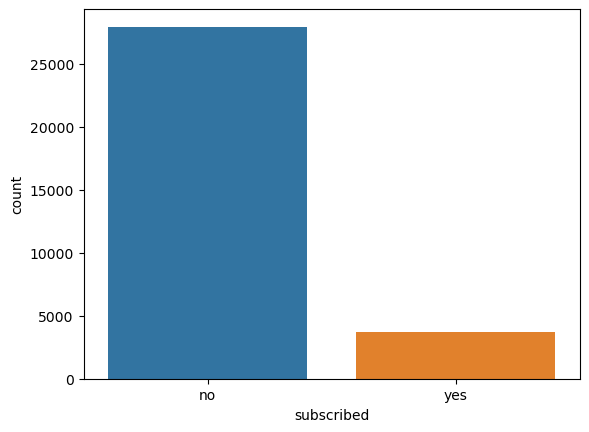

In [22]:
sns.countplot(data=df,x='subscribed')

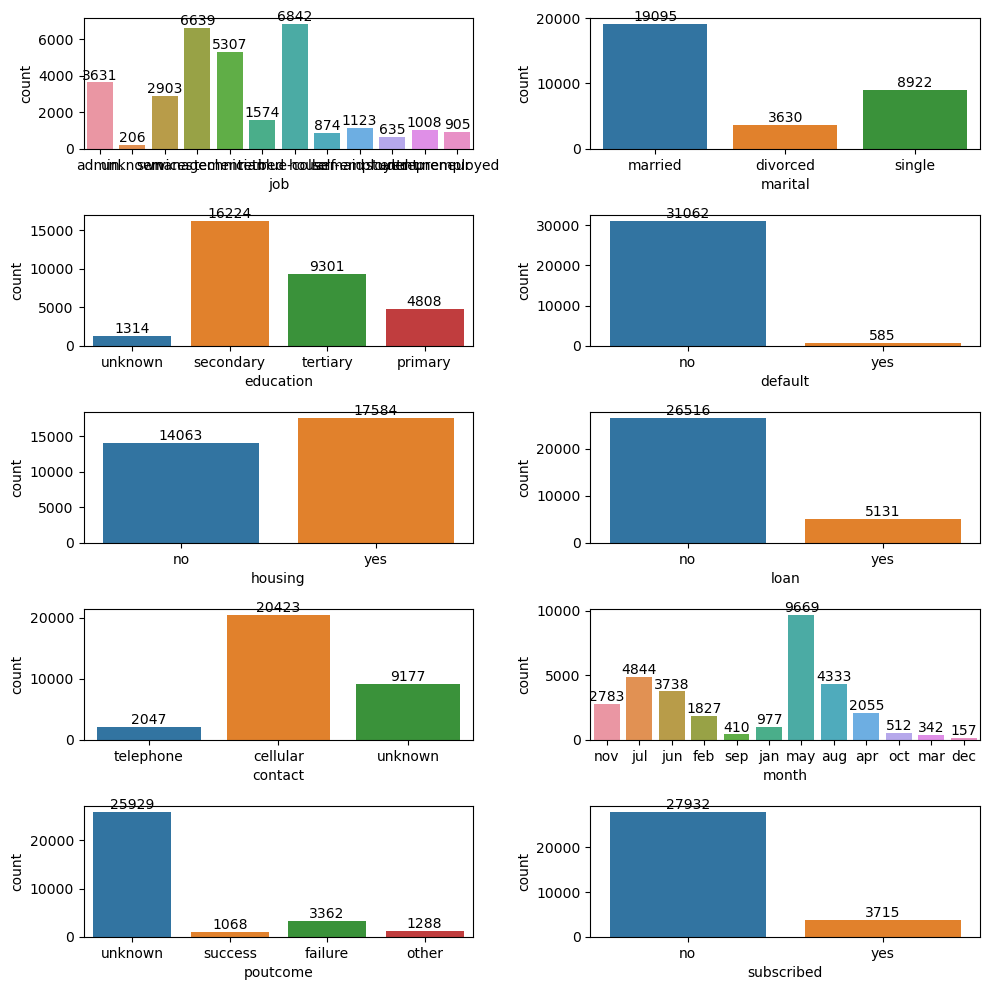

In [23]:
plt.figure(figsize=(10,10))
p=1
for c in cat:
    if p<=10:
        plt.subplot(5,2,p)
        ax=sns.countplot(x=c,data=df)
        for a in ax.containers:
            ax.bar_label(a)
        plt.xlabel(c)
    p+=1
plt.tight_layout()

In [24]:
##From above we observe that people were done more cellular contact regarding other contacts
#People were contacted more in the month of may 
#Less people have taken  personal loan
#More people have taken housing loan
#More people have completed the secondary education
#More people are married

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'admin.'),
  Text(1, 0, 'unknown'),
  Text(2, 0, 'services'),
  Text(3, 0, 'management'),
  Text(4, 0, 'technician'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'blue-collar'),
  Text(7, 0, 'housemaid'),
  Text(8, 0, 'self-employed'),
  Text(9, 0, 'student'),
  Text(10, 0, 'entrepreneur'),
  Text(11, 0, 'unemployed')])

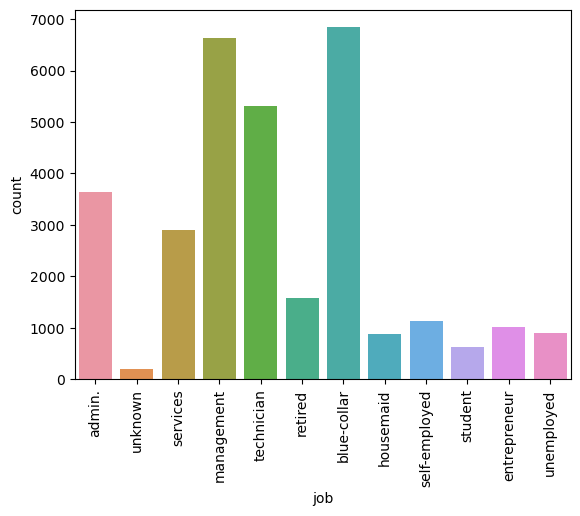

In [25]:
sns.countplot(x='job',data=df)
plt.xticks(rotation=90)

In [26]:
#we observe that most of clients are blue collar people and less are the students for term deposit

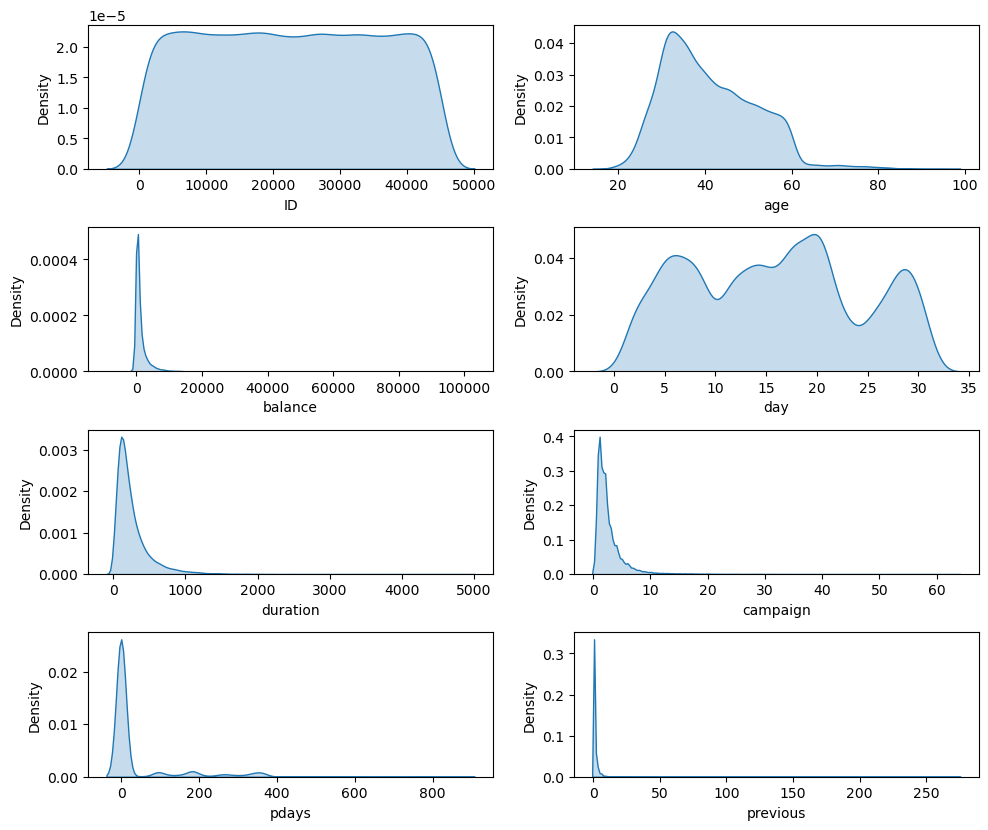

In [27]:
#distribution plot
plt.figure(figsize=(10,10))
p=1
for n in num:
    if p<=10:
        plt.subplot(5,2,p)
        sns.kdeplot(df[n],shade=True)
        
    p+=1
plt.tight_layout()


In [28]:
#we observe that almost all columns have data skewed towards right

In [29]:
#Bivariate Analysis

<Axes: xlabel='marital', ylabel='count'>

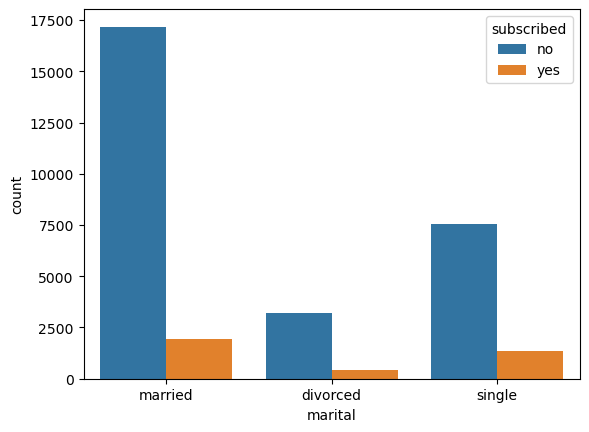

In [30]:
sns.countplot(x='marital',hue='subscribed',data=df)

In [31]:
#we observe that married people have less subscribed for term deposit

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'admin.'),
  Text(1, 0, 'unknown'),
  Text(2, 0, 'services'),
  Text(3, 0, 'management'),
  Text(4, 0, 'technician'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'blue-collar'),
  Text(7, 0, 'housemaid'),
  Text(8, 0, 'self-employed'),
  Text(9, 0, 'student'),
  Text(10, 0, 'entrepreneur'),
  Text(11, 0, 'unemployed')])

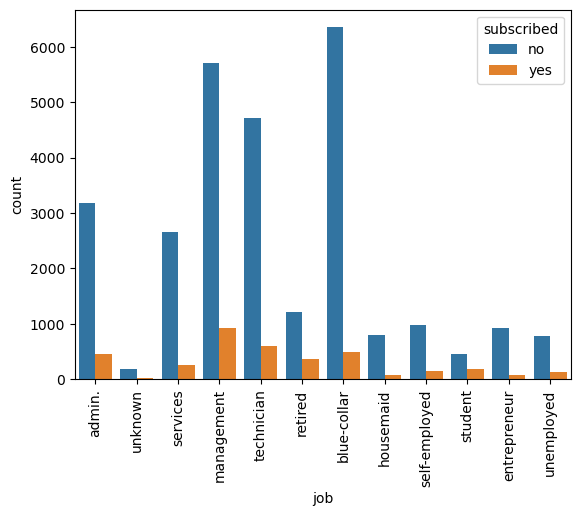

In [32]:
sns.countplot(x='job',hue='subscribed',data=df)
plt.xticks(rotation=90)

In [33]:
#people in th management job have subscribed more for term deposit as compared to other people jobs 

<Axes: xlabel='marital', ylabel='age'>

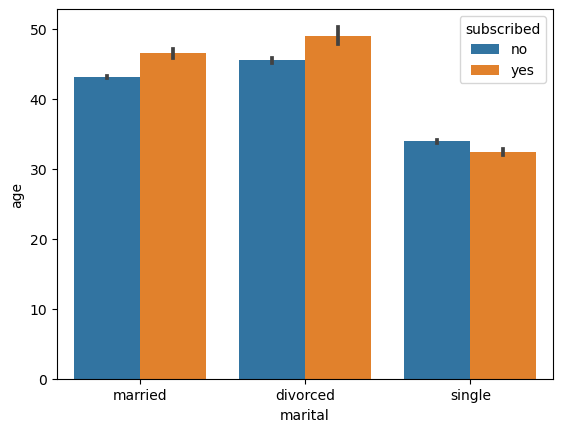

In [34]:
sns.barplot(y='age',x='marital',hue='subscribed',data=df)

In [35]:
#people who have age between 40 to 50 have subscribed  more for term deposit
#people married between the age 40 to 45 have subscribed for term deposit


In [36]:
num

['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

<Axes: xlabel='job'>

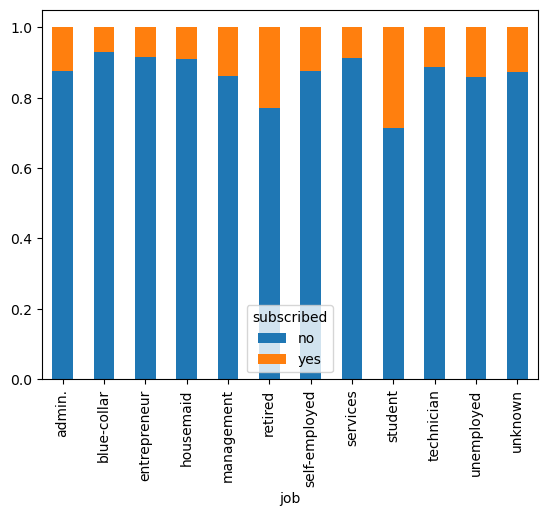

In [37]:
job=pd.crosstab(df['job'],df['subscribed'])
job_plot=job.div(job.sum(1),axis=0)
job_plot.plot.bar(stacked=True)

In [38]:
#From above graph we observe that students and retired people have subscribed more to term deposit as compared to other peoples job

<Axes: xlabel='housing'>

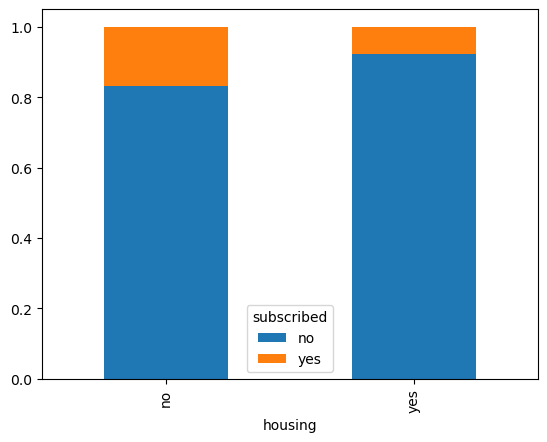

In [39]:
house=pd.crosstab(df['housing'],df['subscribed'])
house_plot=house.div(house.sum(1),axis=0)
house_plot.plot.bar(stacked=True)

In [40]:
#people who have not applied for housing loan have mostly subscribed for termdeposit subscription

<Axes: xlabel='loan'>

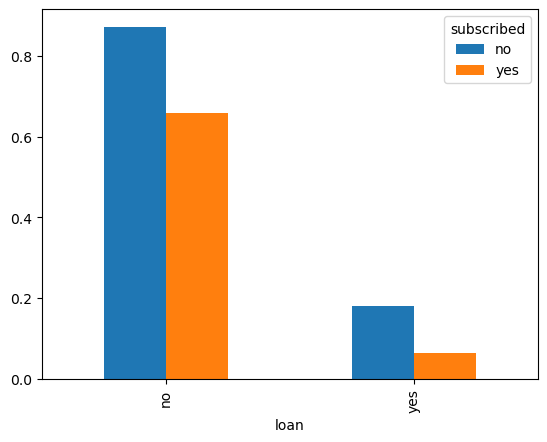

In [41]:
loan=pd.crosstab(df['loan'],df['subscribed'])
loan_plot=loan.div(loan.sum(1),axis=1)
loan_plot.plot.bar()

In [42]:
#people who have not applied for  personal loan have mostly subscribed for term deposit

subscribed     no   yes
loan                   
no          23132  3384
yes          4800   331


<Axes: xlabel='loan'>

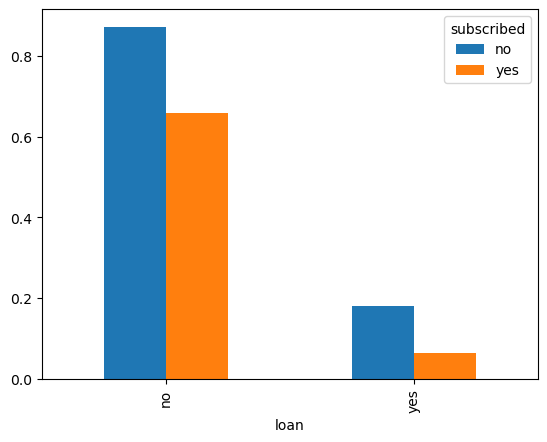

In [43]:
default=pd.crosstab(df['loan'],df['subscribed'])
print(default)
df_plot=loan.div(default.sum(1),axis=1)
df_plot.plot.bar()

In [44]:
#People who have no credit in default have higher chances of subscribing to term deposit

subscribed    no  yes
month                
apr         1671  384
aug         3813  520
dec           85   72
feb         1522  305
jan          880   97
jul         4403  441
jun         3355  383
mar          168  174
may         9020  649
nov         2508  275
oct          288  224
sep          219  191


<Axes: xlabel='month'>

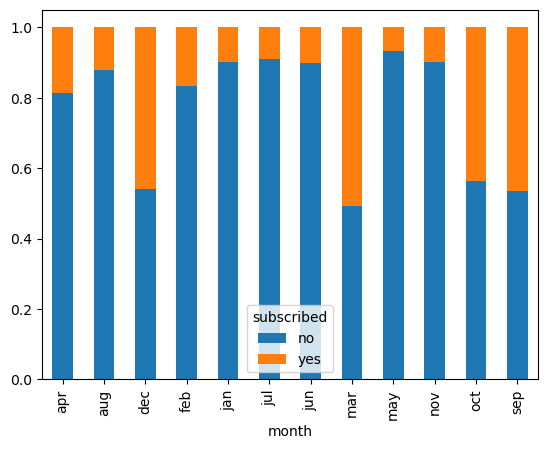

In [45]:
month=pd.crosstab(df['month'],df['subscribed'])
print(month)
month_plot=month.div(month.sum(1),axis=0)
month_plot.plot.bar(stacked=True)

In [46]:
#people in the month of december , march and september have higher chances for term deposit subscription

subscribed     no   yes
contact                
cellular    17352  3071
telephone    1779   268
unknown      8801   376


<Axes: xlabel='contact'>

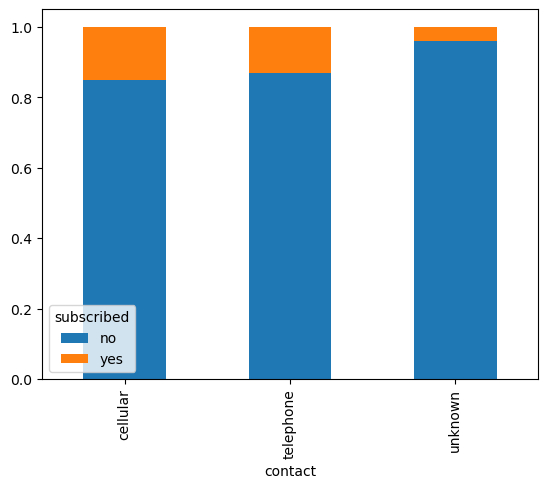

In [47]:
contact=pd.crosstab(df['contact'],df['subscribed'])
print(contact)
contact_plot=contact.div(contact.sum(1),axis=0)
contact_plot.plot.bar(stacked=True)

In [48]:
#people with cellular contact have higher chances for subscription of termdeposit

In [49]:
cat

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'subscribed']

In [50]:
num

['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

<Axes: xlabel='day', ylabel='Count'>

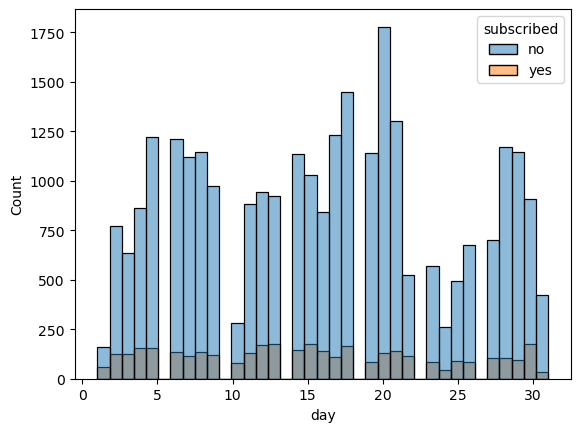

In [51]:
sns.histplot(x='day',hue='subscribed',data=df)

In [52]:
#people contacted in the between 10 to 15th day  of month most likely to subscribe for term deposit

In [53]:
df.duration

0          44
1          91
2         240
3         867
4         380
         ... 
31642     116
31643     438
31644      37
31645      22
31646    1973
Name: duration, Length: 31647, dtype: int64

In [54]:
#MULTIVARIATE ANALYSIS

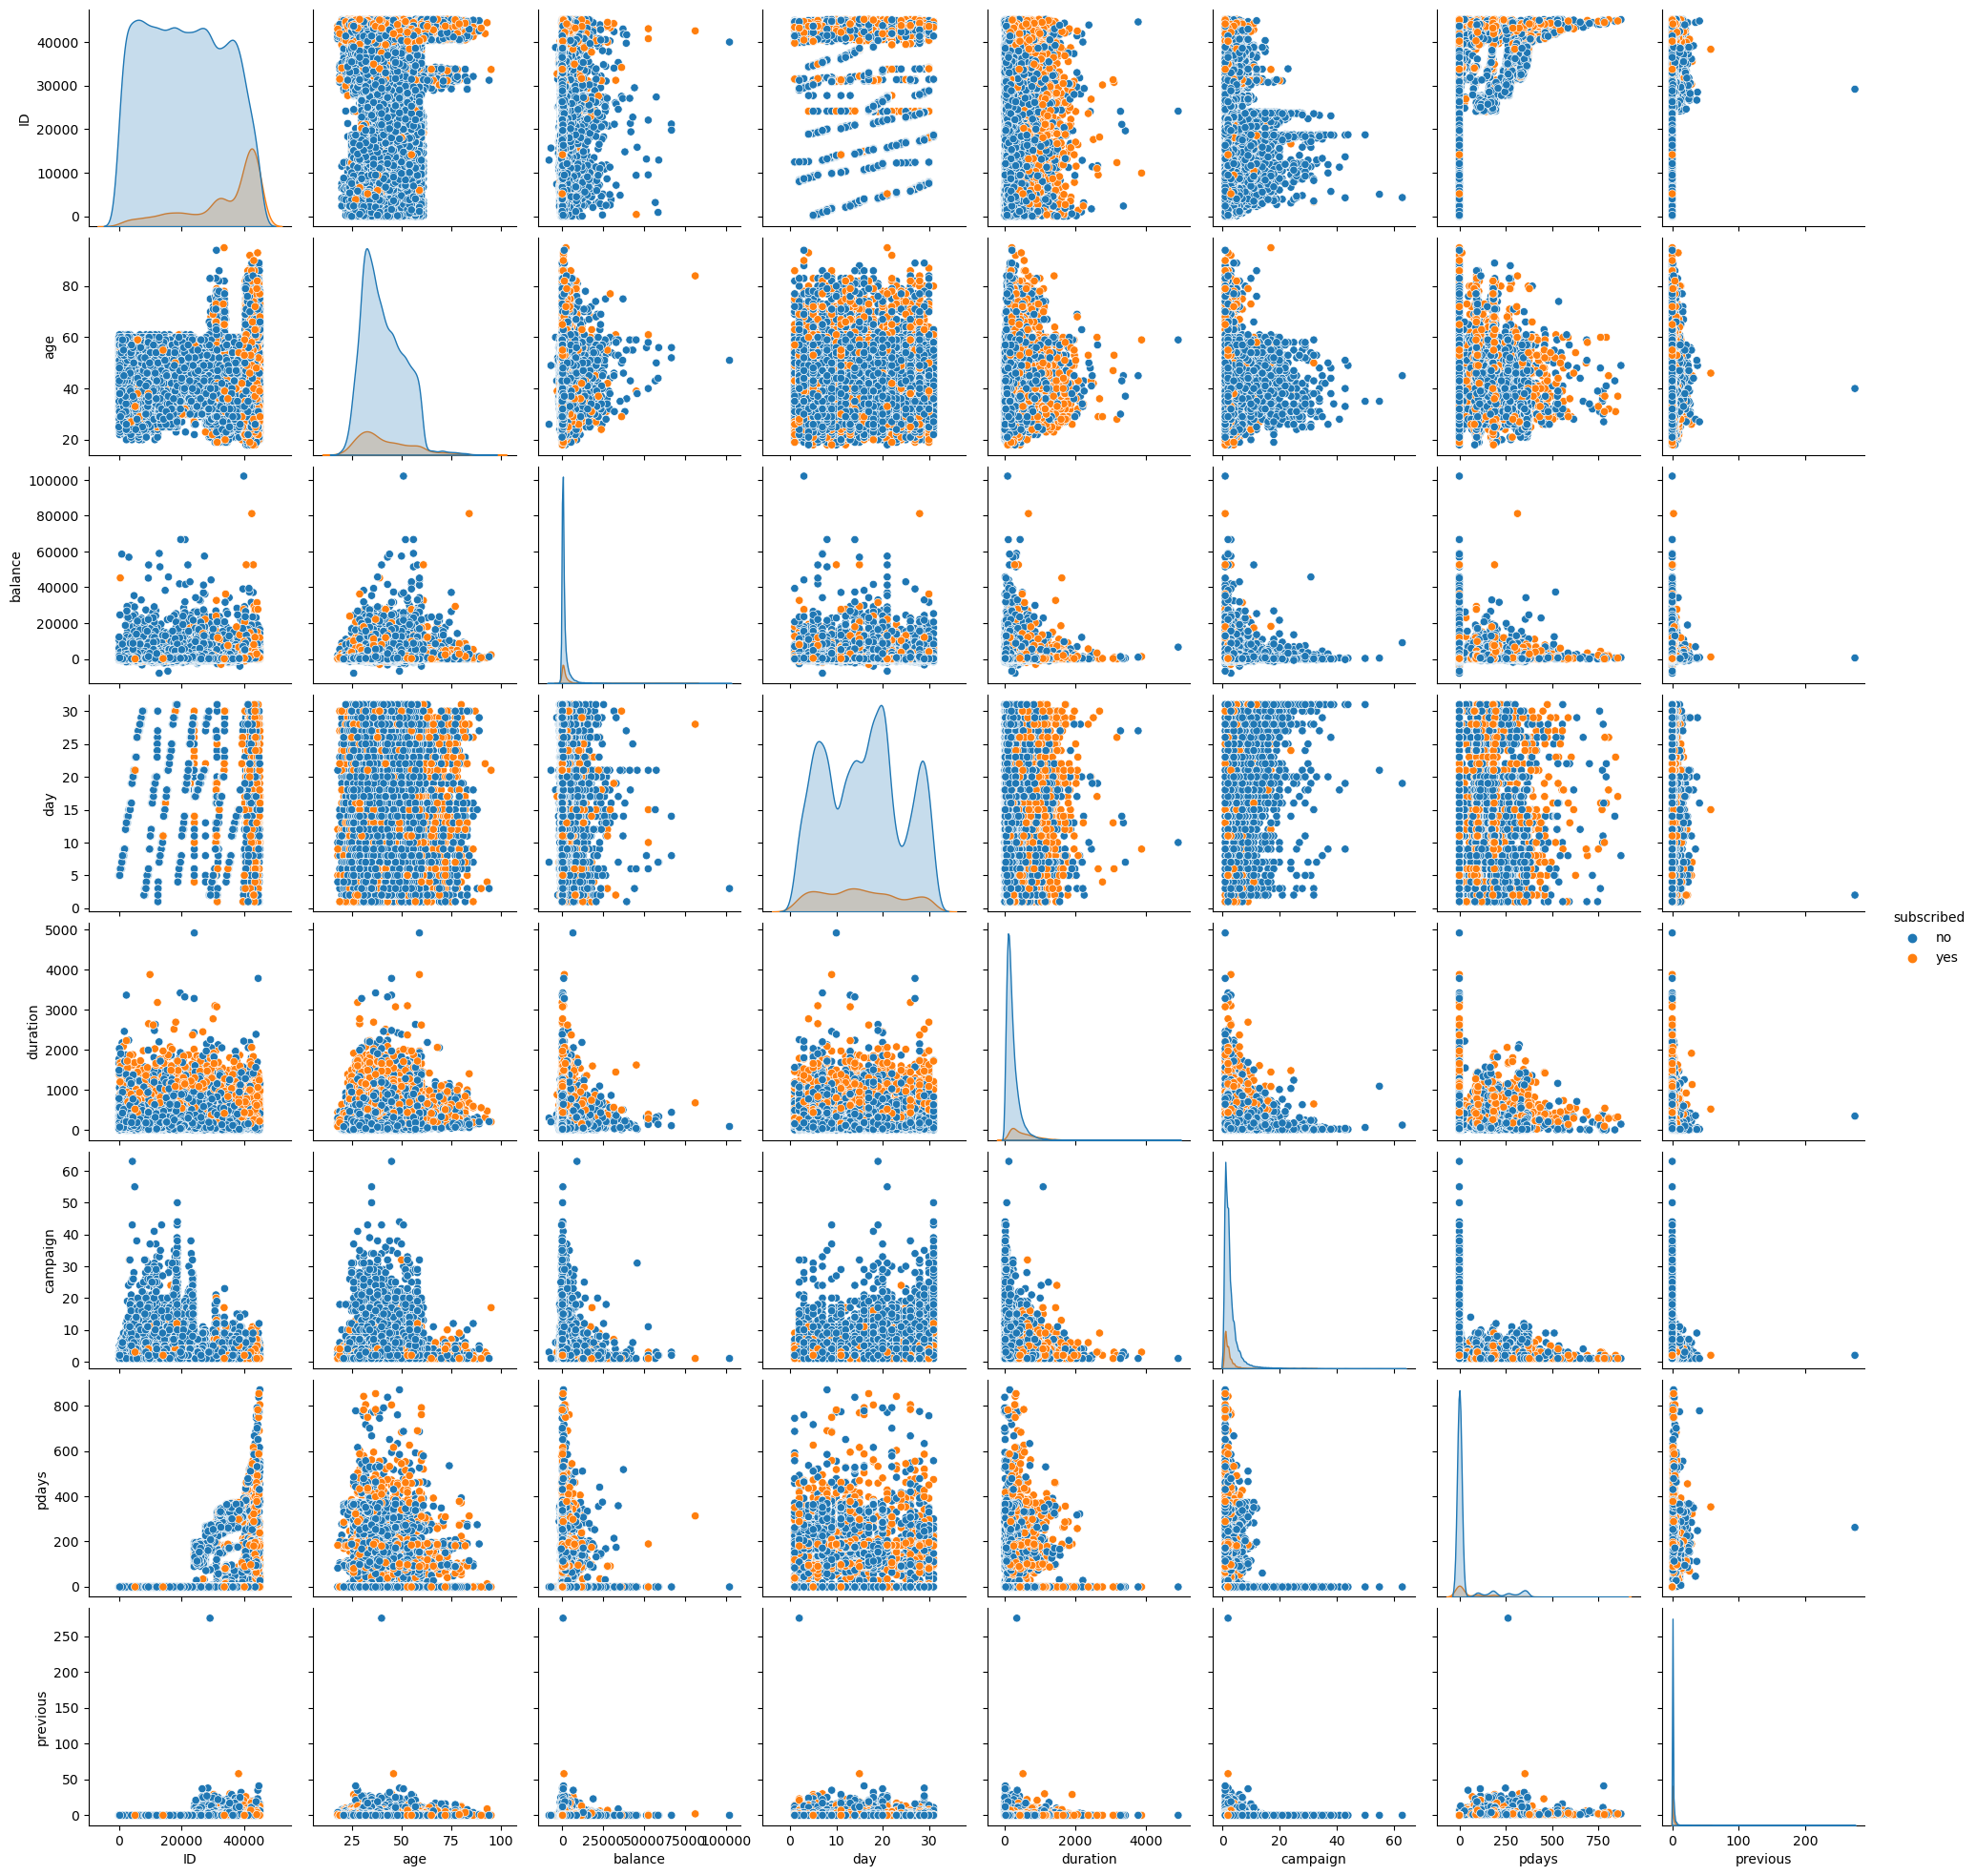

In [55]:
sns.pairplot(df,hue='subscribed')

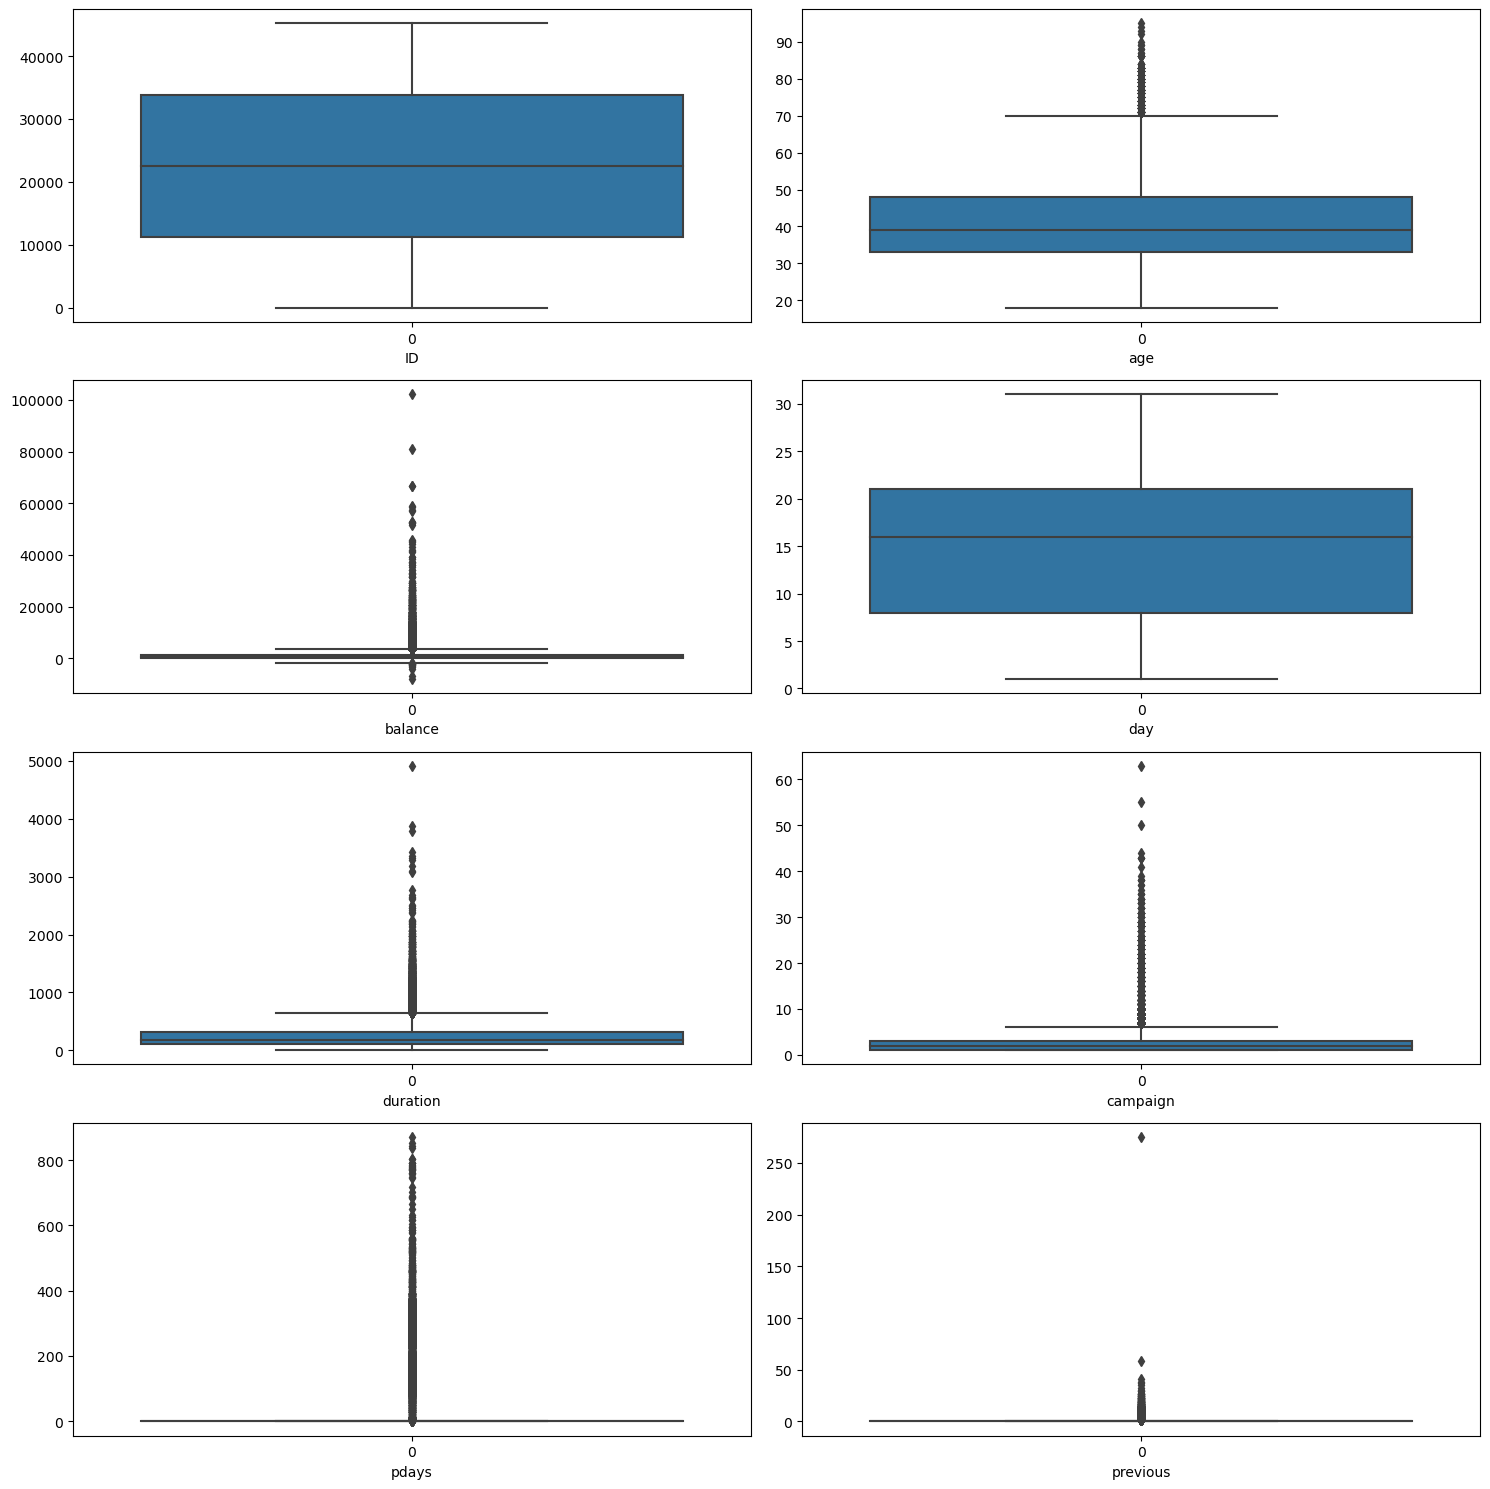

In [57]:
#boxplot for numerical columns for outliers detection
plt.figure(figsize=(15,15))
p=1
for b in num:
    if p<=8:
        plt.subplot(4,2,p)
        sns.boxplot(df[b])
        plt.xlabel(b)
    p+=1
plt.tight_layout()

In [58]:
df.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [62]:
#Checkin for skewness
df.skew()

ID           0.005851
age          0.681607
balance      7.995696
day          0.087185
duration     3.199766
campaign     4.873935
pdays        2.642374
previous    49.302348
dtype: float64

In [65]:
#We notice that balance ,pdays ,previous , campaign columns are not most useful for prediction of subscription
#Hence,not removing skewness from these columns

In [66]:
#Encoding Ctegorical columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for c in df[cat]:
       df[c]=le.fit_transform(df[c].values.reshape(-1,1))
        
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,40576,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,15320,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,43962,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,29842,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,4,2,2,0,0,1,0,0,12,8,116,2,-1,0,3,0
31643,40178,53,4,0,2,0,380,0,1,0,5,6,438,2,-1,0,3,1
31644,19710,32,4,2,2,0,312,0,0,0,7,1,37,3,-1,0,3,0
31645,38556,57,9,1,1,0,225,1,0,1,15,8,22,7,337,12,0,0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   ID          31647 non-null  int64
 1   age         31647 non-null  int64
 2   job         31647 non-null  int32
 3   marital     31647 non-null  int32
 4   education   31647 non-null  int32
 5   default     31647 non-null  int32
 6   balance     31647 non-null  int64
 7   housing     31647 non-null  int32
 8   loan        31647 non-null  int32
 9   contact     31647 non-null  int32
 10  day         31647 non-null  int64
 11  month       31647 non-null  int32
 12  duration    31647 non-null  int64
 13  campaign    31647 non-null  int64
 14  pdays       31647 non-null  int64
 15  previous    31647 non-null  int64
 16  poutcome    31647 non-null  int32
 17  subscribed  31647 non-null  int32
dtypes: int32(10), int64(8)
memory usage: 3.1 MB


In [69]:
#as iD column holds unique iDS of clients ,not furher used for analysis hence dropping column
df.drop('ID',axis=1,inplace=True)

In [70]:
#Checking correlation 
cor=df.corr()
cor

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
age,1.000000,-0.020765,-0.406024,-0.102356,-0.016117,0.103245,-0.183775,-0.012657,0.026733,-0.011056,-0.038368,-0.003870,0.005733,-0.021947,0.005761,0.006466,0.024538
job,-0.020765,1.000000,0.066124,0.170347,-0.005217,0.020638,-0.125347,-0.039049,-0.078253,0.020951,-0.089384,0.002694,0.001469,-0.022552,-0.003032,0.007101,0.038921
marital,-0.406024,0.066124,1.000000,0.107547,-0.009591,0.003487,-0.017846,-0.041654,-0.040180,-0.007686,-0.003834,0.011544,-0.009394,0.019741,0.012717,-0.019770,0.046043
education,-0.102356,0.170347,0.107547,1.000000,-0.006774,0.065176,-0.095376,-0.045950,-0.112000,0.017902,-0.055967,0.003842,0.006142,-0.001566,0.015280,-0.019007,0.066051
default,-0.016117,-0.005217,-0.009591,-0.006774,1.000000,-0.069422,-0.011823,0.081567,0.014053,0.009996,0.004694,-0.010849,0.018538,-0.029622,-0.015877,0.035067,-0.020168
balance,0.103245,0.020638,0.003487,0.065176,-0.069422,1.000000,-0.067466,-0.083631,-0.024083,0.003461,0.023056,0.024274,-0.012032,0.001789,0.013843,-0.019629,0.050807
housing,-0.183775,-0.125347,-0.017846,-0.095376,-0.011823,-0.067466,1.000000,0.036244,0.195103,-0.025666,0.271442,0.003021,-0.021076,0.118790,0.034231,-0.092677,-0.141092
loan,-0.012657,-0.039049,-0.041654,-0.045950,0.081567,-0.083631,0.036244,1.000000,-0.009213,0.014769,0.024186,-0.012781,0.009340,-0.020078,-0.009258,0.010919,-0.072266
contact,0.026733,-0.078253,-0.040180,-0.112000,0.014053,-0.024083,0.195103,-0.009213,1.000000,-0.027046,0.362934,-0.016503,0.022666,-0.245076,-0.141098,0.272083,-0.150051
day,-0.011056,0.020951,-0.007686,0.017902,0.009996,0.003461,-0.025666,0.014769,-0.027046,1.000000,-0.000604,-0.032288,0.159168,-0.087626,-0.048752,0.077586,-0.029600


<Axes: >

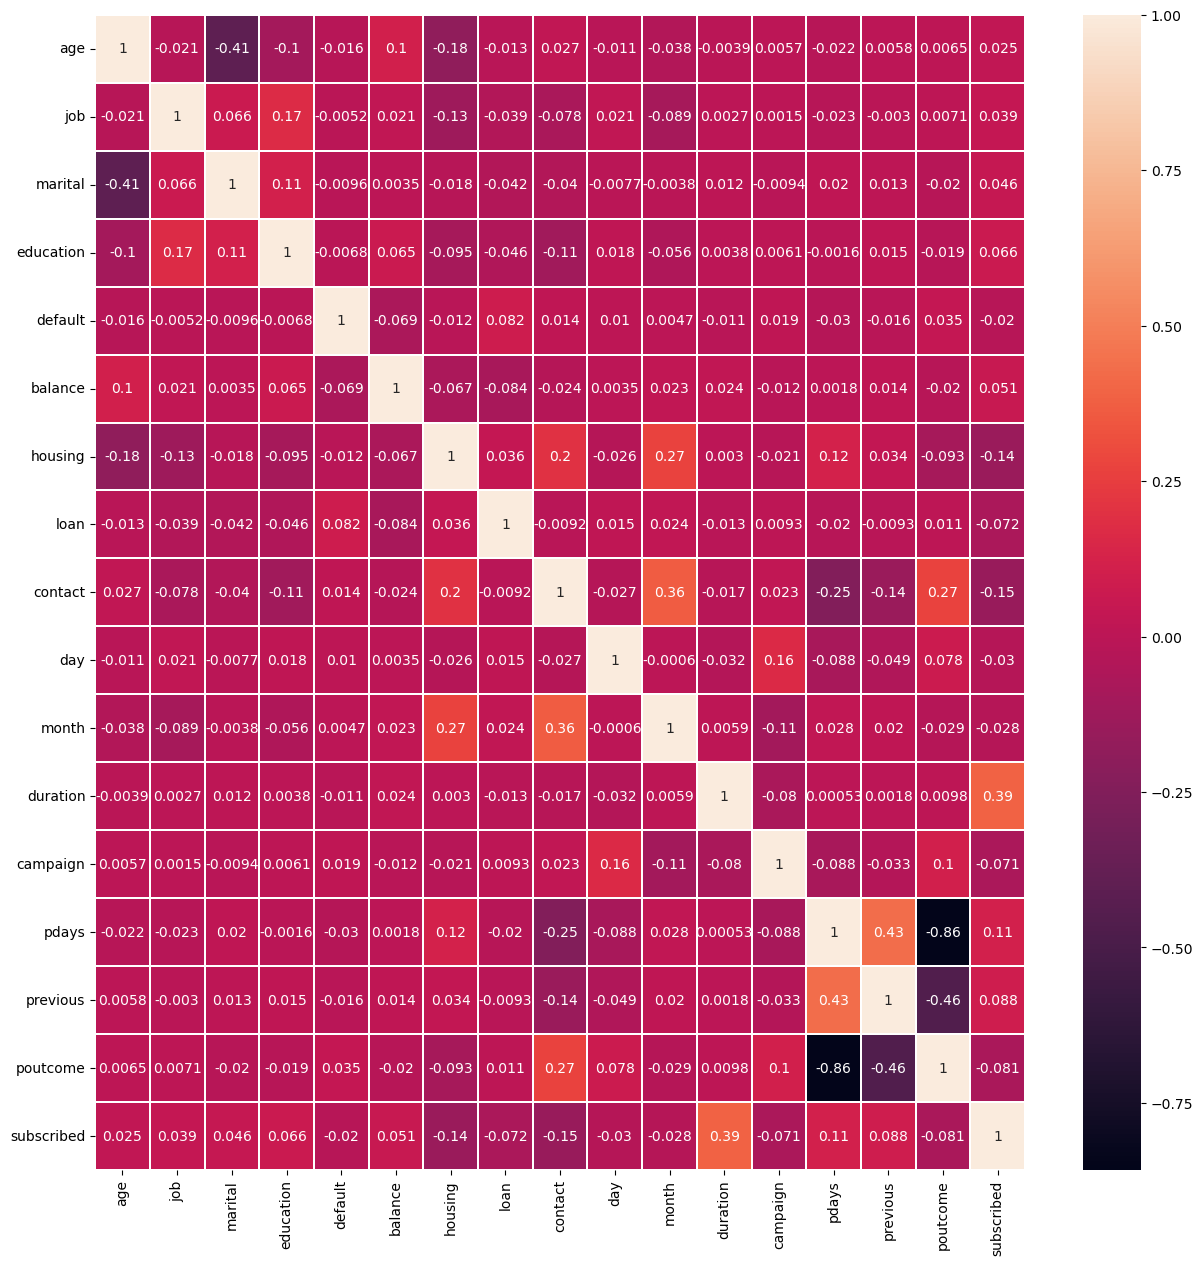

In [71]:
#visualizing correlation values using heatmap
plt.figure(figsize=(15,15))
sns.heatmap(cor,annot=True,linewidths=0.1)

In [72]:
cor.subscribed.sort_values(ascending=True)

contact      -0.150051
housing      -0.141092
poutcome     -0.080895
loan         -0.072266
campaign     -0.070607
day          -0.029600
month        -0.028088
default      -0.020168
age           0.024538
job           0.038921
marital       0.046043
balance       0.050807
education     0.066051
previous      0.088081
pdays         0.108290
duration      0.389838
subscribed    1.000000
Name: subscribed, dtype: float64

In [73]:
#we observe multicollineraity between columns
#few columns are negatively correlated with target variable
#Few columns are positively correlated with target variable


In [74]:
#As balance and educationa are correalted to each other dropping balance column as it less helpful for prediction than education
df.drop('balance',axis=1,inplace=True)

#also day ,month ,default columns are highly correlted to each other
#dropping day column as it is not much helpful for prediction
df.drop('day',axis=1,inplace=True)

In [75]:
#separating target and independent variables
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'subscribed'],
      dtype='object')

In [76]:
x=df.iloc[:,0:-1]
y=df['subscribed']

In [78]:
#Scaling features using standard scalarization techniques
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome
0,1.415793,-1.324317,-0.275405,2.369229,-0.137234,-1.118201,-0.439893,0.395076,1.154007,-0.832754,-0.245906,-0.408555,-0.237059,0.441777
1,-0.937156,2.037729,-0.275405,-0.300345,-0.137234,-1.118201,-0.439893,-0.716695,-0.177462,-0.649957,-0.245906,-0.408555,-0.237059,0.441777
2,-1.313627,0.815167,-0.275405,-0.300345,-0.137234,0.894294,-0.439893,-0.716695,-0.177462,-0.070449,-0.567059,-0.408555,-0.237059,0.441777
3,1.509911,-0.101755,-1.922374,1.034442,-0.137234,-1.118201,-0.439893,-0.716695,0.155405,2.368149,-0.567059,0.447299,1.001336,-0.576498
4,-0.937156,1.426448,-0.275405,-0.300345,-0.137234,0.894294,-0.439893,-0.716695,-0.843197,0.474054,-0.567059,-0.408555,-0.237059,0.441777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,-1.125392,-0.101755,1.371563,1.034442,-0.137234,0.894294,-0.439893,-0.716695,0.821140,-0.552724,-0.245906,-0.408555,-0.237059,0.441777
31643,1.133439,-0.101755,-1.922374,1.034442,-0.137234,-1.118201,2.273280,-0.716695,0.155405,0.699635,-0.245906,-0.408555,-0.237059,0.441777
31644,-0.843038,-0.101755,1.371563,1.034442,-0.137234,-1.118201,-0.439893,-0.716695,-1.508931,-0.859979,0.075247,-0.408555,-0.237059,0.441777
31645,1.509911,1.426448,-0.275405,-0.300345,-0.137234,0.894294,-0.439893,0.395076,0.821140,-0.918319,1.359859,2.994723,4.716521,-2.613048


In [81]:
#Checking vIF values for collinearity between columns
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vi=pd.DataFrame()
vi['values']=[vif(x.values,i) for i in range(len(x.columns)) ]
vi['columns']=x.columns

vi

,values,columns
0,1.268701,age
1,1.050224,job
2,1.220726,marital
3,1.063016,education
4,1.009010,default
5,1.189112,housing
6,1.014999,loan
7,1.316494,contact
8,1.244422,month
9,1.007981,duration


In [82]:
#dropping pdays and poutcome column as they are highly collinear to other columns
x.drop('pdays',axis=1,inplace=True)
x.drop('poutcome',axis=1,inplace=True)

In [85]:
#Checking again for collinearity
vi=pd.DataFrame()
vi['values']=[vif(x.values,i) for i in range(len(x.columns)) ]
vi['columns']=x.columns

vi

,values,columns
0,1.267141,age
1,1.049671,job
2,1.220324,marital
3,1.061960,education
4,1.008374,default
5,1.165114,housing
6,1.014061,loan
7,1.217495,contact
8,1.235490,month
9,1.007072,duration


In [86]:
#Droppinng month column as it negatively correlated to target variable
x.drop('month',axis=1,inplace=True)

In [87]:
#Checking imbalance in the target variable
df.subscribed.value_counts()

0    27932
1     3715
Name: subscribed, dtype: int64

In [90]:
#balancing the target var as it has more unsubscribed customers using sampling techniques
!pip install imblearn
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x1,y1=sm.fit_resample(x,y)

In [92]:
y1.value_counts()

0    27932
1    27932
Name: subscribed, dtype: int64

In [101]:
x,y=x1,y1

In [103]:
y

0        0
1        0
2        0
3        1
4        0
        ..
55859    1
55860    1
55861    1
55862    1
55863    1
Name: subscribed, Length: 55864, dtype: int32

In [95]:
#we notice that the target variable has 0 and 1 values ,so the problem is considered as classification problem

In [93]:
#Hence y is balanced now

Model Building

In [100]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC

!pip install xgboost

import xgboost as xgb


In [104]:
#creating train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.30)


In [105]:
#LR
lr=LogisticRegression()
lr.fit(x_train,y_train)
ypred=lr.predict(x_test)
acc=accuracy_score(y_test,ypred)
print(acc)
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))

0.8008353221957041
[[6729 1693]
 [1645 6693]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      8422
           1       0.80      0.80      0.80      8338

    accuracy                           0.80     16760
   macro avg       0.80      0.80      0.80     16760
weighted avg       0.80      0.80      0.80     16760



In [106]:
#RFC
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
ypred=rfc.predict(x_test)
acc=accuracy_score(y_test,ypred)
print(acc)
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))

0.924582338902148
[[7643  779]
 [ 485 7853]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      8422
           1       0.91      0.94      0.93      8338

    accuracy                           0.92     16760
   macro avg       0.93      0.92      0.92     16760
weighted avg       0.93      0.92      0.92     16760



In [108]:
#ETC
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
ypred=etc.predict(x_test)
acc=accuracy_score(y_test,ypred)
print(acc)
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))

0.9331742243436754
[[7615  807]
 [ 313 8025]]
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      8422
           1       0.91      0.96      0.93      8338

    accuracy                           0.93     16760
   macro avg       0.93      0.93      0.93     16760
weighted avg       0.93      0.93      0.93     16760



In [110]:
#SVC
svc=SVC()
svc.fit(x_train,y_train)
ypred=svc.predict(x_test)
acc=accuracy_score(y_test,ypred)
print(acc)
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))

0.8337708830548926
[[6584 1838]
 [ 948 7390]]
              precision    recall  f1-score   support

           0       0.87      0.78      0.83      8422
           1       0.80      0.89      0.84      8338

    accuracy                           0.83     16760
   macro avg       0.84      0.83      0.83     16760
weighted avg       0.84      0.83      0.83     16760



In [111]:
#xgb
xgbc=xgb.XGBClassifier()
xgbc.fit(x_train,y_train)
ypred=xgbc.predict(x_test)
acc=accuracy_score(y_test,ypred)
print(acc)
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))

0.9225536992840095
[[7809  613]
 [ 685 7653]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      8422
           1       0.93      0.92      0.92      8338

    accuracy                           0.92     16760
   macro avg       0.92      0.92      0.92     16760
weighted avg       0.92      0.92      0.92     16760



In [112]:
#GBC
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
ypred=gbc.predict(x_test)
acc=accuracy_score(y_test,ypred)
print(acc)
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))

0.8878281622911695
[[7314 1108]
 [ 772 7566]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      8422
           1       0.87      0.91      0.89      8338

    accuracy                           0.89     16760
   macro avg       0.89      0.89      0.89     16760
weighted avg       0.89      0.89      0.89     16760



In [113]:
#From above we observe that max accuracy is obrtained in the model ExtaTreesClassifier

In [114]:
#lets Validate the data again using cross_val_score
#LR
score=cross_val_score(lr,x,y,cv=5)
print(score)
print(score.mean())
print('Difference between accuracy score and cross val score',(acc-score.mean())*100)

[0.79781616 0.80372326 0.80264924 0.81383693 0.80397422]
0.8043999637379624
Difference between accuracy score and cross val score 8.342819855320705


In [115]:
#RFC
score=cross_val_score(rfc,x,y,cv=5)
print(score)
print(score.mean())
print('Difference between accuracy score and cross val score',(acc-score.mean())*100)

[0.85814016 0.94271905 0.94424058 0.94450908 0.94172932]
0.9262676403709532
Difference between accuracy score and cross val score -3.843947807978376


In [116]:
##ETC
score=cross_val_score(etc,x,y,cv=5)
print(score)
print(score.mean())
print('Difference between accuracy score and cross val score',(acc-score.mean())*100)

[0.9215072  0.94701513 0.94737313 0.9453146  0.94307197]
0.9408564051188693
Difference between accuracy score and cross val score -5.30282428276998


In [120]:
##SVC
score=cross_val_score(svc,x,y,cv=5)
print(score)
print(score.mean())
print('Difference between accuracy score and cross val score',(acc-score.mean())*100)

[0.82985769 0.8362123  0.83970286 0.84390942 0.83834586]
0.8376056268838209
Difference between accuracy score and cross val score 5.022253540734855


In [118]:
##GBC
score=cross_val_score(gbc,x,y,cv=5)
print(score)
print(score.mean())
print('Difference between accuracy score and cross val score',(acc-score.mean())*100)

[0.81276291 0.90253289 0.89859483 0.90557594 0.90109202]
0.8841117173904189
Difference between accuracy score and cross val score 0.3716444900750515


In [119]:
##XGBC
score=cross_val_score(xgbc,x,y,cv=5)
print(score)
print(score.mean())
print('Difference between accuracy score and cross val score',(acc-score.mean())*100)

[0.7391032  0.95014768 0.94638862 0.9517587  0.94933763]
0.9073471643717854
Difference between accuracy score and cross val score -1.9519002080615966


In [ ]:
#from above the we choose XGBC providing maximum accuarcy withg least error


XGBoost classifier as main model

In [121]:
#Hyperparameter tuning the model
parameters={
    'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gcv=GridSearchCV(xgbc,parameters)
gcv.fit(x_train,y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)})

In [122]:
gcv.best_params_

{'max_depth': 9, 'min_child_weight': 1}

In [123]:
#Building model with specified parameters
xgbc=xgb.XGBClassifier(max_depth= 9,min_child_weight=1)
xgbc.fit(x_train,y_train)
ypred=xgbc.predict(x_test)
acc=accuracy_score(y_test,ypred)
print(acc)
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))

0.9289976133651552
[[7845  577]
 [ 613 7725]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      8422
           1       0.93      0.93      0.93      8338

    accuracy                           0.93     16760
   macro avg       0.93      0.93      0.93     16760
weighted avg       0.93      0.93      0.93     16760



#XGBOOST classifier giving accuracy of 93%

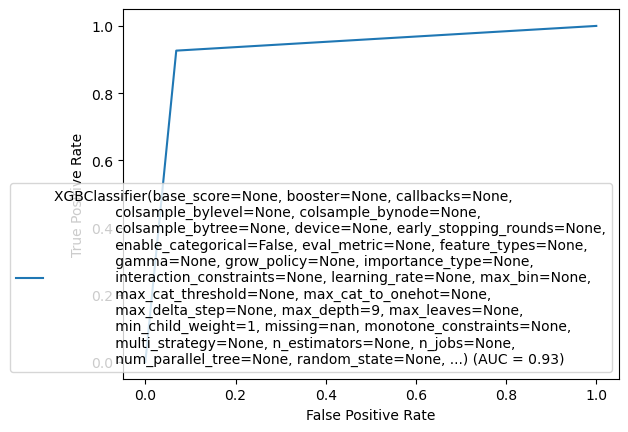

In [126]:
#Building Auc Roc curve
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(y_test,ypred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=xgbc)
display.plot()

In [127]:
#Auc score=0,93 which is good score as it should be close to 1 for beter model performance

In [128]:
#Saving the best model
import joblib
joblib.dump(xgbc,'train_term_deposit_prediction.pkl')

['train_term_deposit_prediction.pkl']

In [129]:
model=joblib.load('train_term_deposit_prediction.pkl')
model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [130]:
prediction=model.predict(x_test)
df2=pd.DataFrame()
df2['actual values']=np.array(y_test)
df2['predicted values']=prediction

In [131]:
df2

,actual values,predicted values
0,1,1
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
16755,1,1
16756,0,0
16757,1,1
16758,1,1
